In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

In [2]:
import pandas as pd
df1 = pd.read_excel('C:/Users/dudtj/OneDrive - 숭실대학교 - Soongsil University/Desktop/CL/python/강서구 경진대회/data/서울특별시 강서구_가로쓰레기통 설치 정보_20210901.xlsx')
df2 = pd.read_excel('C:/Users/dudtj/OneDrive - 숭실대학교 - Soongsil University/Desktop/CL/python/강서구 경진대회/data/강서구 생활인구(2020 1분기~2021 3분기 동정보포함).xlsx')

In [3]:
#글씨설정
plt.rc("font",family="Malgun Gothic")
sns.set(font="Margun Gothic",rc={"axes.unicode_minus":False},style='darkgrid')
mpl.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

#맷플롯립 한글 설정
font_path = r'C:\Users\dudtj\OneDrive\Desktop\금융데이터\NanumFontSetup_TTF_ALL'
fontprop = fm.FontProperties(fname=font_path, size=18)

In [4]:
df1.head()

,연번,자치구명,도로(가로)명,설치위치,세부위치,설치지점,수거 쓰레기 종류,형태,담당자 연락처
0,1,서울특별시 강서구,가로공원로,화곡1동,나누리병원 16-199,버스정류장,일반쓰레기 수거용,일반쓰레기통,02-2600-4067
1,2,서울특별시 강서구,가로공원로,화곡1동,나누리병원 16-200,버스정류장,일반쓰레기 수거용,일반쓰레기통,02-2600-4067
2,3,서울특별시 강서구,강서로,화곡1동,까치산역 16-192,버스정류장,일반쓰레기 수거용,일반쓰레기통,02-2600-4067
3,4,서울특별시 강서구,강서로,화곡1동,까치산역 16-192,버스정류장,재활용수거,일반쓰레기통,02-2600-4067
4,5,서울특별시 강서구,강서로,화곡1동,화곡역.현대주유소 16-205,버스정류장,일반쓰레기 수거용,일반쓰레기통,02-2600-4067


In [5]:
df2.head()

,기준 년코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_생활인구_수,동 정보
0,2020,4,A,골목상권,1000552,가로공원로76가길,632563,화곡1동
1,2020,3,A,골목상권,1000552,가로공원로76가길,703492,화곡1동
2,2021,3,A,골목상권,1000552,가로공원로76가길,525757,화곡1동
3,2020,2,A,골목상권,1000552,가로공원로76가길,714248,화곡1동
4,2021,2,A,골목상권,1000552,가로공원로76가길,502344,화곡1동


In [6]:
groups = df1.groupby('설치위치')
data1=groups.count() #평균
data1=data1.reset_index()
data1=data1[['설치위치','연번']]
data1.columns=['동 정보','개수']
data1.head()

,동 정보,개수
0,가양1동,51
1,가양2동,11
2,가양3동,15
3,공항동,24
4,등촌1동,10


In [7]:
df3=df2[df2["기준 년코드"]==2021.0] #2021년
df3=df2[df2["기준_분기_코드"]==3]#df3은 21년,3분기 것만.

In [8]:
groups = df2.groupby('동 정보')
data2=groups.mean() #평균
data2=data2.reset_index()
data2=data2[['동 정보','총_생활인구_수']]

In [9]:
df5 = pd.read_excel('C:/Users/dudtj/OneDrive - 숭실대학교 - Soongsil University/Desktop/CL/python/강서구 경진대회/data/행정동코드_매핑정보_2018_1.xlsx')
df5.head()

,통계청행정동코드,행자부행정동코드,시도명,시군구명,동 정보
0,1116051,11500510,서울,강서구,염창동
1,1116052,11500520,서울,강서구,등촌1동
2,1116053,11500530,서울,강서구,등촌2동
3,1116054,11500535,서울,강서구,등촌3동
4,1116055,11500590,서울,강서구,화곡본동


In [10]:
last_df=pd.merge(data1,data2,on='동 정보')
last_df['개수/생활인구']=last_df['개수']/last_df['총_생활인구_수']*10000
last_df['총_생활인구_수[단위:1만명]']=last_df['총_생활인구_수']/10000
last_df

,동 정보,개수,총_생활인구_수,개수/생활인구,총_생활인구_수[단위:1만명]
0,가양1동,51,2.025333e+05,2.518105,20.253329
1,공항동,24,6.389930e+05,0.375591,63.899300
2,등촌1동,10,4.217219e+05,0.237123,42.172193
3,등촌2동,12,6.320865e+05,0.189847,63.208648
4,등촌3동,16,1.385180e+05,1.155085,13.851800
5,발산1동,19,6.665132e+05,0.285066,66.651319
6,방화1동,16,6.054130e+05,0.264282,60.541300
7,방화2동,14,5.938310e+05,0.235757,59.383096
8,염창동,16,7.947948e+05,0.201310,79.479479
9,우장산동,11,7.938244e+05,0.138570,79.382439


In [11]:
df_code=pd.merge(last_df,df5,on='동 정보')
df_code.head()

,동 정보,개수,총_생활인구_수,개수/생활인구,총_생활인구_수[단위:1만명],통계청행정동코드,행자부행정동코드,시도명,시군구명
0,가양1동,51,202533.285714,2.518105,20.253329,1116064,11500603,서울,강서구
1,공항동,24,638993.000000,0.375591,63.899300,1116069,11500620,서울,강서구
2,등촌1동,10,421721.928571,0.237123,42.172193,1116052,11500520,서울,강서구
3,등촌2동,12,632086.476190,0.189847,63.208648,1116053,11500530,서울,강서구
4,등촌3동,16,138518.000000,1.155085,13.851800,1116054,11500535,서울,강서구


In [12]:
#df_code.to_excel("동 기준 쓰레기통 및 생활인구수.xlsx")

In [13]:
last_df.sort_values('개수',ascending=False).head()

,동 정보,개수,총_생활인구_수,개수/생활인구,총_생활인구_수[단위:1만명]
0,가양1동,51,202533.285714,2.518105,20.253329
10,화곡1동,24,950739.814286,0.252435,95.073981
1,공항동,24,638993.000000,0.375591,63.899300
5,발산1동,19,666513.190476,0.285066,66.651319
6,방화1동,16,605413.000000,0.264282,60.541300


In [14]:
last_df.sort_values('총_생활인구_수',ascending=False).head()

,동 정보,개수,총_생활인구_수,개수/생활인구,총_생활인구_수[단위:1만명]
15,화곡8동,2,1.008358e+06,0.019834,100.835843
10,화곡1동,24,9.507398e+05,0.252435,95.073981
16,화곡본동,6,8.635931e+05,0.069477,86.359307
14,화곡6동,16,8.207713e+05,0.194939,82.077133
8,염창동,16,7.947948e+05,0.201310,79.479479


In [15]:
last_df.sort_values('개수/생활인구').head()

,동 정보,개수,총_생활인구_수,개수/생활인구,총_생활인구_수[단위:1만명]
15,화곡8동,2,1.008358e+06,0.019834,100.835843
11,화곡2동,3,6.888078e+05,0.043554,68.880775
16,화곡본동,6,8.635931e+05,0.069477,86.359307
12,화곡3동,5,5.262232e+05,0.095017,52.622321
13,화곡4동,6,6.107031e+05,0.098247,61.070306


화곡8동이 가장 적어서 화곡8동으로 하는 편이 나을듯.

In [16]:
ratio_df = last_df.sort_values('개수/생활인구')
ratio_df.rename(columns={'개수/생활인구':'개수/총생활인구[단위:1만명]'},inplace=True)
ratio_df.reset_index(inplace=True)
ratio_df

,index,동 정보,개수,총_생활인구_수,개수/총생활인구[단위:1만명],총_생활인구_수[단위:1만명]
0,15,화곡8동,2,1.008358e+06,0.019834,100.835843
1,11,화곡2동,3,6.888078e+05,0.043554,68.880775
2,16,화곡본동,6,8.635931e+05,0.069477,86.359307
3,12,화곡3동,5,5.262232e+05,0.095017,52.622321
4,13,화곡4동,6,6.107031e+05,0.098247,61.070306
5,9,우장산동,11,7.938244e+05,0.138570,79.382439
6,3,등촌2동,12,6.320865e+05,0.189847,63.208648
7,14,화곡6동,16,8.207713e+05,0.194939,82.077133
8,8,염창동,16,7.947948e+05,0.201310,79.479479
9,7,방화2동,14,5.938310e+05,0.235757,59.383096


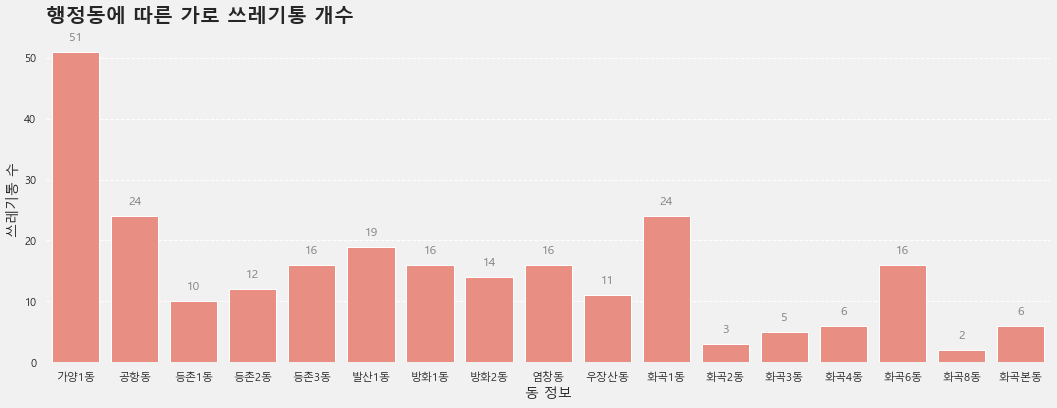

In [17]:
fig = plt.figure(figsize=(18,6))
ax=sns.barplot(x="동 정보",y="개수",data=last_df,color="salmon")

bg_color="#f1f1f1"
fig.patch.set_facecolor(bg_color)
fig.set_facecolor(bg_color)

for p in ax.patches:
    ax.annotate(format(p.get_height(),'.0f'),
               (p.get_x()+p.get_width()/2.,
               p.get_height()),
               ha='center',va='center',
               size=12,color='grey',
               xytext=(0,14),
               textcoords='offset points')
plt.xlabel("동 정보",size=14)
plt.ylabel("쓰레기통 수",size=14)
plt.title("행정동에 따른 가로 쓰레기통 개수",size=20,weight='bold',pad='13',loc='left')
plt.box(False)
plt.grid(True,axis='y',alpha=10,linestyle='--')
plt.show()

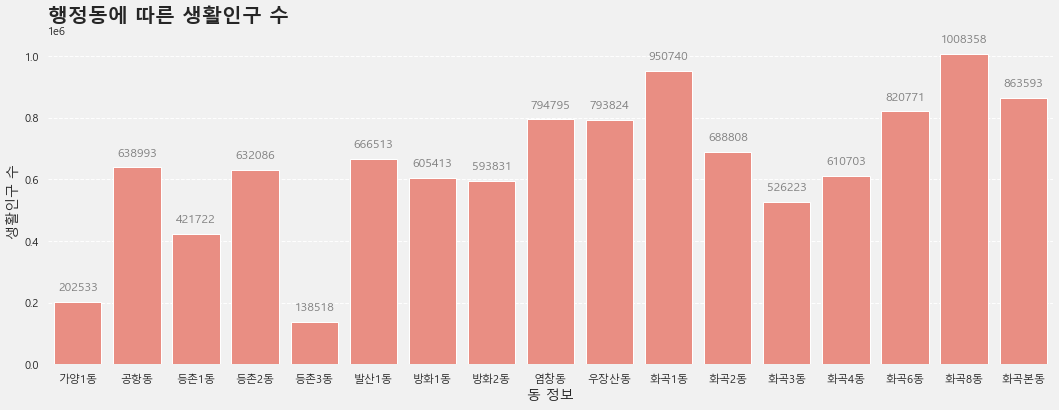

In [18]:
fig = plt.figure(figsize=(18,6))
ax=sns.barplot(x="동 정보",y="총_생활인구_수",data=last_df,color="salmon")

bg_color="#f1f1f1"
fig.patch.set_facecolor(bg_color)
fig.set_facecolor(bg_color)

for p in ax.patches:
    ax.annotate(format(p.get_height(),'.0f'),
               (p.get_x()+p.get_width()/2.,
               p.get_height()),
               ha='center',va='center',
               size=12,color='grey',
               xytext=(0,14),
               textcoords='offset points')
plt.xlabel("동 정보",size=14)
plt.ylabel("생활인구 수",size=14)
plt.title("행정동에 따른 생활인구 수",size=20,weight='bold',pad='15',loc='left')
plt.box(False)
plt.grid(True,axis='y',alpha=10,linestyle='--')
plt.show()

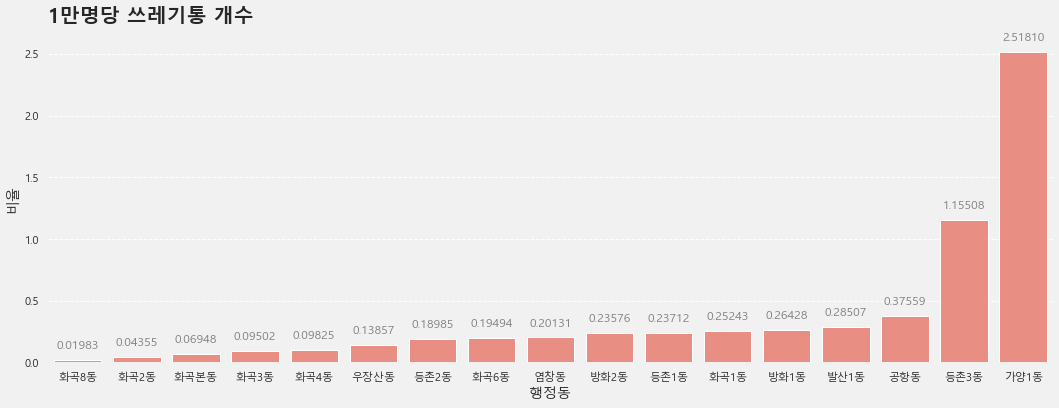

In [19]:
fig = plt.figure(figsize=(18,6))
ax=sns.barplot(x="동 정보",y="개수/총생활인구[단위:1만명]",data=ratio_df,color="salmon")

bg_color="#f1f1f1"
fig.patch.set_facecolor(bg_color)
fig.set_facecolor(bg_color)

for p in ax.patches:
    ax.annotate(format(p.get_height(),'.5f'),
               (p.get_x()+p.get_width()/2.,
               p.get_height()),
               ha='center',va='center',
               size=12,color='grey',
               xytext=(0,14),
               textcoords='offset points')
plt.xlabel("행정동",size=14)
plt.ylabel("비율",size=14)
plt.title("1만명당 쓰레기통 개수",size=20,weight='bold',pad='13',loc='left')
plt.box(False)
plt.grid(True,axis='y',alpha=10,linestyle='--')
plt.show()

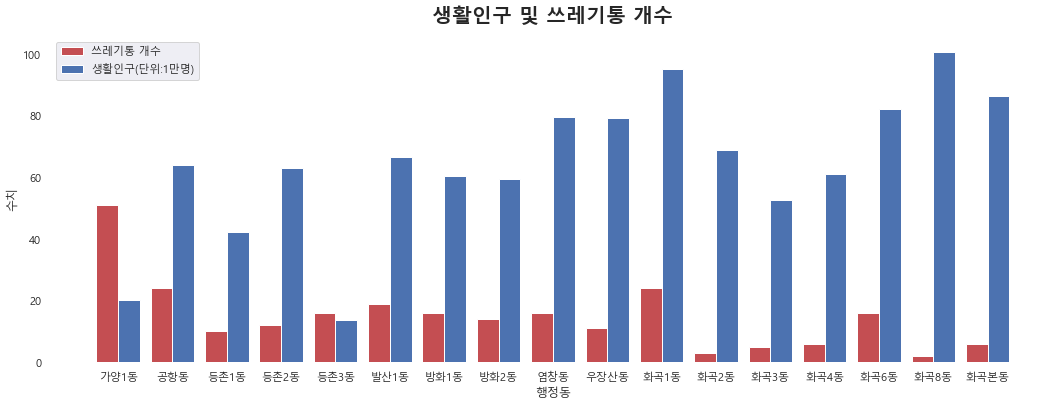

In [20]:
import numpy
fig,ax=plt.subplots(figsize=(18,6))
x=numpy.arange(len(last_df['동 정보']))

plt.bar(x-0.2,last_df['개수'],color='r',label='쓰레기통 개수',width=0.4)
plt.bar(x+0.2,last_df['총_생활인구_수[단위:1만명]'],label='생활인구(단위:1만명)',color='b',width=0.4)
plt.xticks(x,last_df['동 정보'])
plt.legend()
plt.xlabel('행정동')
plt.ylabel('수치')
plt.title('생활인구 및 쓰레기통 개수',size=20,weight='bold',pad='13')
plt.box(False)
plt.grid(True,axis='y',alpha=10,linestyle='--')
plt.show()

In [21]:
else_df=ratio_df[0:5]

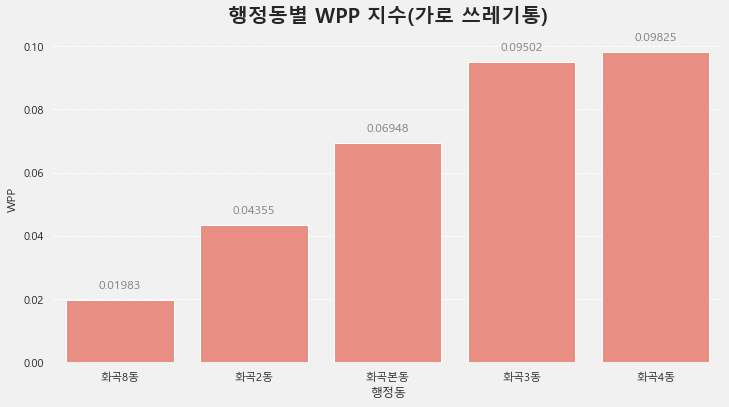

In [22]:
fig = plt.figure(figsize=(12,6))
ax=sns.barplot(x="동 정보",y="개수/총생활인구[단위:1만명]",data=else_df,color="salmon")

bg_color="#f1f1f1"
fig.patch.set_facecolor(bg_color)
fig.set_facecolor(bg_color)

for p in ax.patches:
    ax.annotate(format(p.get_height(),'.5f'),
               (p.get_x()+p.get_width()/2.,
               p.get_height()),
               ha='center',va='center',
               size=12,color='grey',
               xytext=(0,14),
               textcoords='offset points')
plt.xlabel("행정동",size=12)
plt.ylabel("WPP",size=12)
plt.title("행정동별 WPP 지수(가로 쓰레기통)",size=20,weight='bold',pad='13')
plt.box(False)
plt.grid(True,axis='y',alpha=10,linestyle='--')
plt.show()